## What is MSE about?
MSE or Maximum Square Estimation is about maximizing the geometric mean of spacings in the data. Such spacings are the differences between the values of the cumulative distribution function at neighbouring data points. Is also known as the Maximum Product of space estimations or MSP. The idea is of choosing the parameter values that make the observed data as uniform as possible, according to a specific quantitative measure of uniformity.

MSE tends to be better than ML at estimating "J" distributions. So lets try it out with a type I Pareto! 

## Imports and constants

In [1]:
import numpy as np
from scipy.stats.mstats import gmean
from scipy.stats import pareto
import matplotlib.pyplot as plt
print plt.style.available
plt.style.use('ggplot')

#this is the real shape parameter that we will try to approximate with MSE
realAlpha=3
#the left limit of this Pareto distribution
realXm=1.
#pareto distribution CDF (all xi in x are >=1)
parICDF= lambda x,alpha: 1.-(realXm/x)**alpha
#number of samples to estimate from
nSamples=10000
#multiplier for alphas
multAlphas=100.
#select some range of alphas from which to do the MSE
low=1.0
high=5.0
alphasForSearch=np.linspace(low,high,num=(high-low)*multAlphas)
#which distribution
distribution=pareto

def sampleSpacings(x):
    #calculates the sample spacings of X
    D=[xi-x[i] for i,xi in enumerate(x[1:])]
    return np.array(D)
        
        

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


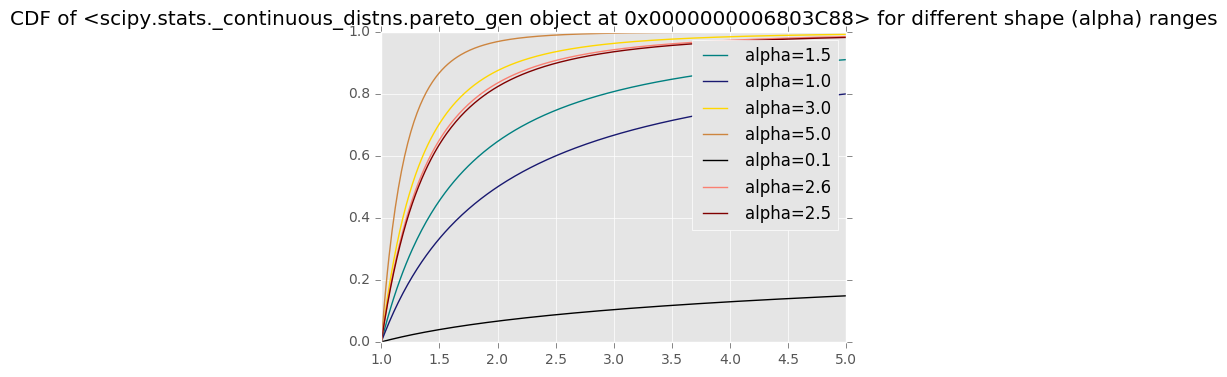

In [2]:
#lets plot some ordered samples of the pareto I CDF, for different alphas
alphasubset={0.1:'black',
             1.:'midnightblue',
             1.5:'teal',
             2.5:'maroon',
             2.6:'salmon',
             3.:'gold',
             5.:'peru'}
x=np.linspace(realXm,5,num=300)
plt.title('CDF of {} for different shape (alpha) ranges'.format(distribution))
for alphax in alphasubset:
    plt.plot(x, parICDF(x,alphax), color=alphasubset[alphax], label='alpha={}'.format(alphax))
plt.legend()
plt.grid(True)
plt.show()



We start with the assumption of a variable X with a CDF $F(x;\theta_0)$, where $\theta_0 \in \Theta$ is an unknown parameter to be estimated, and from which we can take iid random samples. 

The spacings over which we will estimate the geometric mean ($D_i$) are the the differences between $F(x(i);\theta)$ and $F(x(i-1);\theta)$, for i [1,n+1].

With those assumptions, we do the following: 

In [4]:
#Get an iid random sample ${x1, …, xn}$ from a variable.
sample=distribution.rvs(realAlpha,size=nSamples)
#Sort the elements of the samples. This becomes the ordered sample ${x(1), …, x(n)}$. 
orderedSample=np.sort(sample)


In [5]:

#print 'alphas for search: {}'.format(alphasForSearch)
#logarithm of the geometric mean of the sample spacings from the CDF. 
#the CDF comes from an expression that requests samples (X) 
#and an alpha paramter
scoresMSE=np.array([np.log(gmean(sampleSpacings(parICDF(orderedSample,alphax)))) for alphax in alphasForSearch])
#print 'MSE scores: {}'.format(scoresMSE)
bestMSE=scoresMSE.argmax()
#closest
print 'best alpha MSE:{} -> {}'.format(alphasForSearch[bestMSE],scoresMSE[bestMSE])


best alpha MSE:3.01503759398 -> -9.79227883494


In [6]:
#now lets look at scores for ML
scoresML=np.array([np.sum(np.log(distribution.pdf(sample,alphax)))/nSamples for alphax in alphasForSearch])
bestML=scoresML.argmax()
#print 'ML scores: {}'.format(scoresML)
print 'best alpha ML: {} -> {}'.format(alphasForSearch[bestML],scoresML[bestML])

best alpha ML: 3.00501253133 -> -0.23078379627


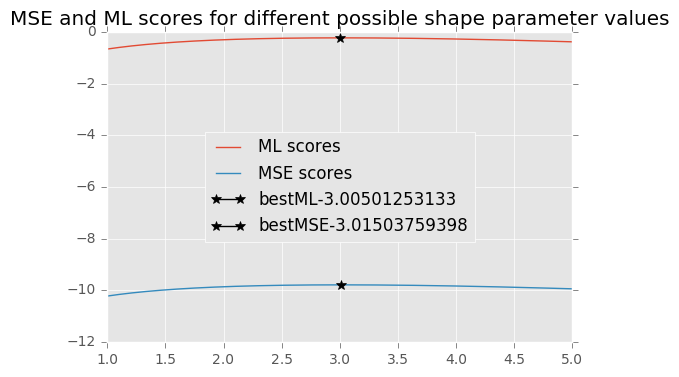

In [7]:
#Plot ML and MSE scores
plt.title('MSE and ML scores for different possible shape parameter values')

plt.plot(alphasForSearch,scoresML, label='ML scores')
plt.plot(alphasForSearch,scoresMSE, label='MSE scores')
plt.plot(alphasForSearch[bestML],scoresML[bestML],color='k',label='bestML-{}'.format(alphasForSearch[bestML]),marker='*',markersize=7)
plt.plot(alphasForSearch[bestMSE],scoresMSE[bestMSE],color='k',label='bestMSE-{}'.format(alphasForSearch[bestMSE]),marker='*',markersize=7)
plt.legend(loc='center')
plt.grid(True)
plt.show()
